### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [2]:
import pandas as pd

# Load data (assuming you have a CSV or database with product details)
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Generate frequency table for product category
category_freq = df['category'].value_counts()

# Display top 5 most listed product categories
top_5_categories = category_freq.head(5)
print(top_5_categories)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


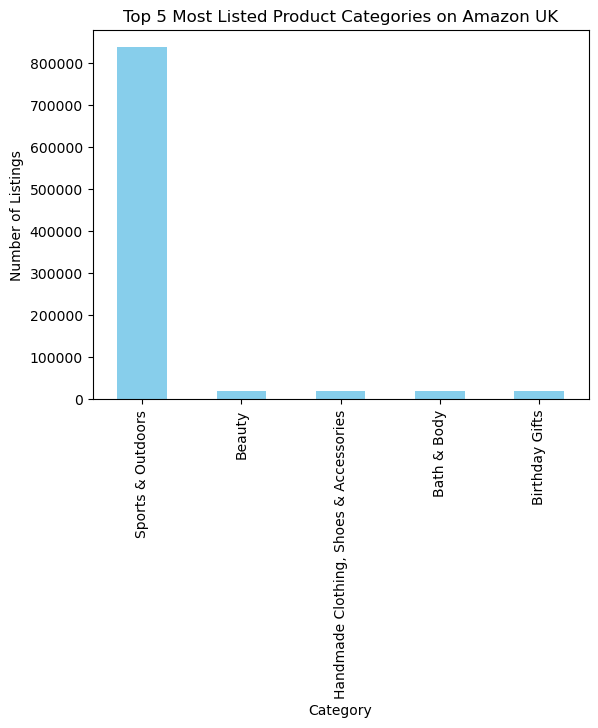

In [3]:
import matplotlib.pyplot as plt

# Plot the bar chart for top 5 categories
category_freq.head(5).plot(kind='bar', color='skyblue')
plt.title("Top 5 Most Listed Product Categories on Amazon UK")
plt.xlabel("Category")
plt.ylabel("Number of Listings")
plt.show()

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [4]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]  # mode() returns a series, so we take the first mode if multiple

print(f"Mean price: {mean_price}, Median price: {median_price}, Mode price: {mode_price}")

Mean price: 89.24380943923663, Median price: 19.09, Mode price: 9.99


In [5]:
import numpy as np

variance = df['price'].var()
std_dev = df['price'].std()
price_range = df['price'].max() - df['price'].min()
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print(f"Variance: {variance}, Standard Deviation: {std_dev}")
print(f"Range: {price_range}, Interquartile Range (IQR): {iqr}")

Variance: 119445.48532256528, Standard Deviation: 345.60886175352226
Range: 100000.0, Interquartile Range (IQR): 36.0


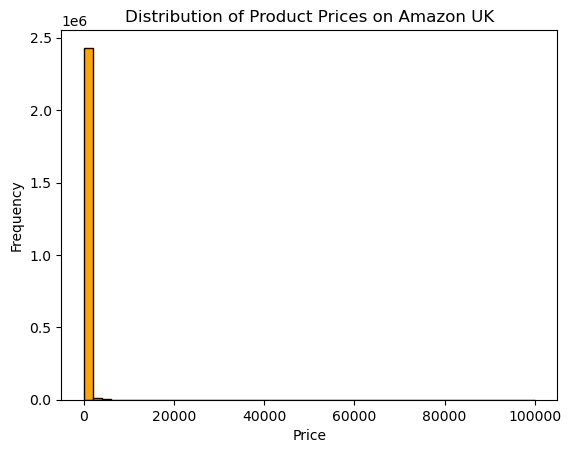

In [6]:
df['price'].plot(kind='hist', bins=50, color='orange', edgecolor='black')
plt.title("Distribution of Product Prices on Amazon UK")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

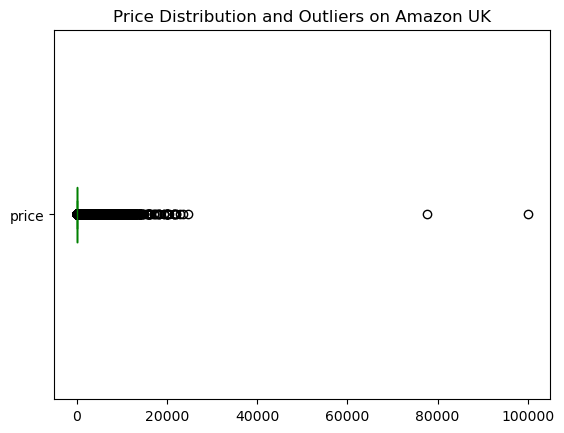

In [7]:
df['price'].plot(kind='box', vert=False, color='green')
plt.title("Price Distribution and Outliers on Amazon UK")
plt.show()

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [11]:
mean_stars = df['stars'].mean()
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()[0]  # mode() returns a series, so we take the first mode if multiple

print(f"Mean stars: {mean_stars}, Median stars: {median_stars}, Mode stars: {mode_stars}")

Mean stars: 2.152836472966065, Median stars: 0.0, Mode stars: 0.0


In [12]:
stars_variance = df['stars'].var()
stars_std_dev = df['stars'].std()
stars_range = df['stars'].max() - df['stars'].min()
stars_iqr = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

print(f"Stars Variance: {stars_variance}, Stars Standard Deviation: {stars_std_dev}")
print(f"Stars Range: {stars_range}, Stars Interquartile Range (IQR): {stars_iqr}")

Stars Variance: 4.81743402976196, Stars Standard Deviation: 2.1948653785054697
Stars Range: 5.0, Stars Interquartile Range (IQR): 4.4


In [13]:
from scipy.stats import skew, kurtosis

stars_skewness = skew(df['stars'].dropna())  # dropna() to ignore NaN values
stars_kurtosis = kurtosis(df['stars'].dropna())

print(f"Skewness of stars: {stars_skewness}, Kurtosis of stars: {stars_kurtosis}")

Skewness of stars: 0.08120730776283354, Kurtosis of stars: -1.926004642549839


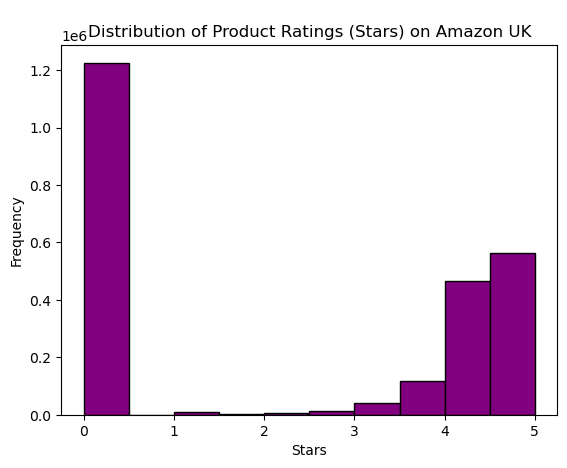

In [14]:
df['stars'].plot(kind='hist', bins=10, color='purple', edgecolor='black')
plt.title("Distribution of Product Ratings (Stars) on Amazon UK")
plt.xlabel("Stars")
plt.ylabel("Frequency")
plt.show()